In [1]:
library(tidyr)
library(plyr)
library(dplyr)
library(ggplot2)

Warning message:
"package 'tidyr' was built under R version 4.2.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# Create metrics table
# Simulations are zero-indexed
df = read.csv("results_marginal.csv")
nsim = max(df$sim) + 1
means = df %>% select(concern, accuracy, precision, recall, f1.score) %>% 
        group_by(concern) %>% 
        summarize(mean_accuracy = round(mean(accuracy), 2),
                  se_accuracy = round(sd(accuracy)/sqrt(nsim), 3),
                  min_accuracy = round(min(accuracy), 2),
                  max_accuracy = round(max(accuracy), 2),
                  mean_precision = round(mean(precision), 2),
                  se_precision = round(sd(precision)/sqrt(nsim), 3),
                  min_precision = round(min(precision), 2),
                  max_precision = round(max(precision), 2),
                  mean_recall = round(mean(recall), 2),
                  se_recall = round(sd(recall)/sqrt(nsim), 3),
                  min_recall = round(min(recall), 2),
                  max_recall = round(max(recall), 2),
                  mean_f1 = round(mean(f1.score), 2),
                  se_f1 = round(sd(f1.score)/sqrt(nsim), 3),
                  min_f1 = round(min(f1.score), 2),
                  max_f1 = round(max(f1.score), 2)) %>%
        arrange(desc(mean_f1))

In [3]:
means %>% select(concern, mean_f1, mean_precision, mean_recall) #se_accuracy, se_f1, se_precision, se_recall

concern,mean_f1,mean_precision,mean_recall
<chr>,<dbl>,<dbl>,<dbl>
Availability,0.94,0.94,0.94
EnforceUse,0.93,0.93,0.94
NotWornE,0.92,0.92,0.92
WornIncorrectlyE,0.90,0.93,0.88
FitTest,0.86,0.93,0.83
EnforceCorrectUse,0.84,0.93,0.79
NotWornNE,0.77,0.89,0.72
PPEDiscouragedProhibited,0.77,0.89,0.71
Training,0.75,0.91,0.68


In [4]:
df_means = means %>% select(concern, mean_f1, mean_precision, mean_recall) %>% 
pivot_longer(cols = c(mean_f1, mean_precision, mean_recall), names_to = "Type", values_to = "Score")

In [5]:
df_ses = means %>% select(concern, se_accuracy, se_f1, se_precision, se_recall)
df_ses

concern,se_accuracy,se_f1,se_precision,se_recall
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Availability,0.001,0.001,0.001,0.001
EnforceUse,0.001,0.001,0.001,0.001
NotWornE,0.001,0.001,0.001,0.001
WornIncorrectlyE,0.000,0.002,0.002,0.003
FitTest,0.000,0.005,0.005,0.007
EnforceCorrectUse,0.000,0.004,0.004,0.005
NotWornNE,0.000,0.004,0.005,0.005
PPEDiscouragedProhibited,0.000,0.005,0.006,0.006
Training,0.000,0.005,0.006,0.005


In [6]:
label_order = means %>% arrange(desc(mean_f1)) %>% select(concern) %>% unlist
names(label_order) = NULL

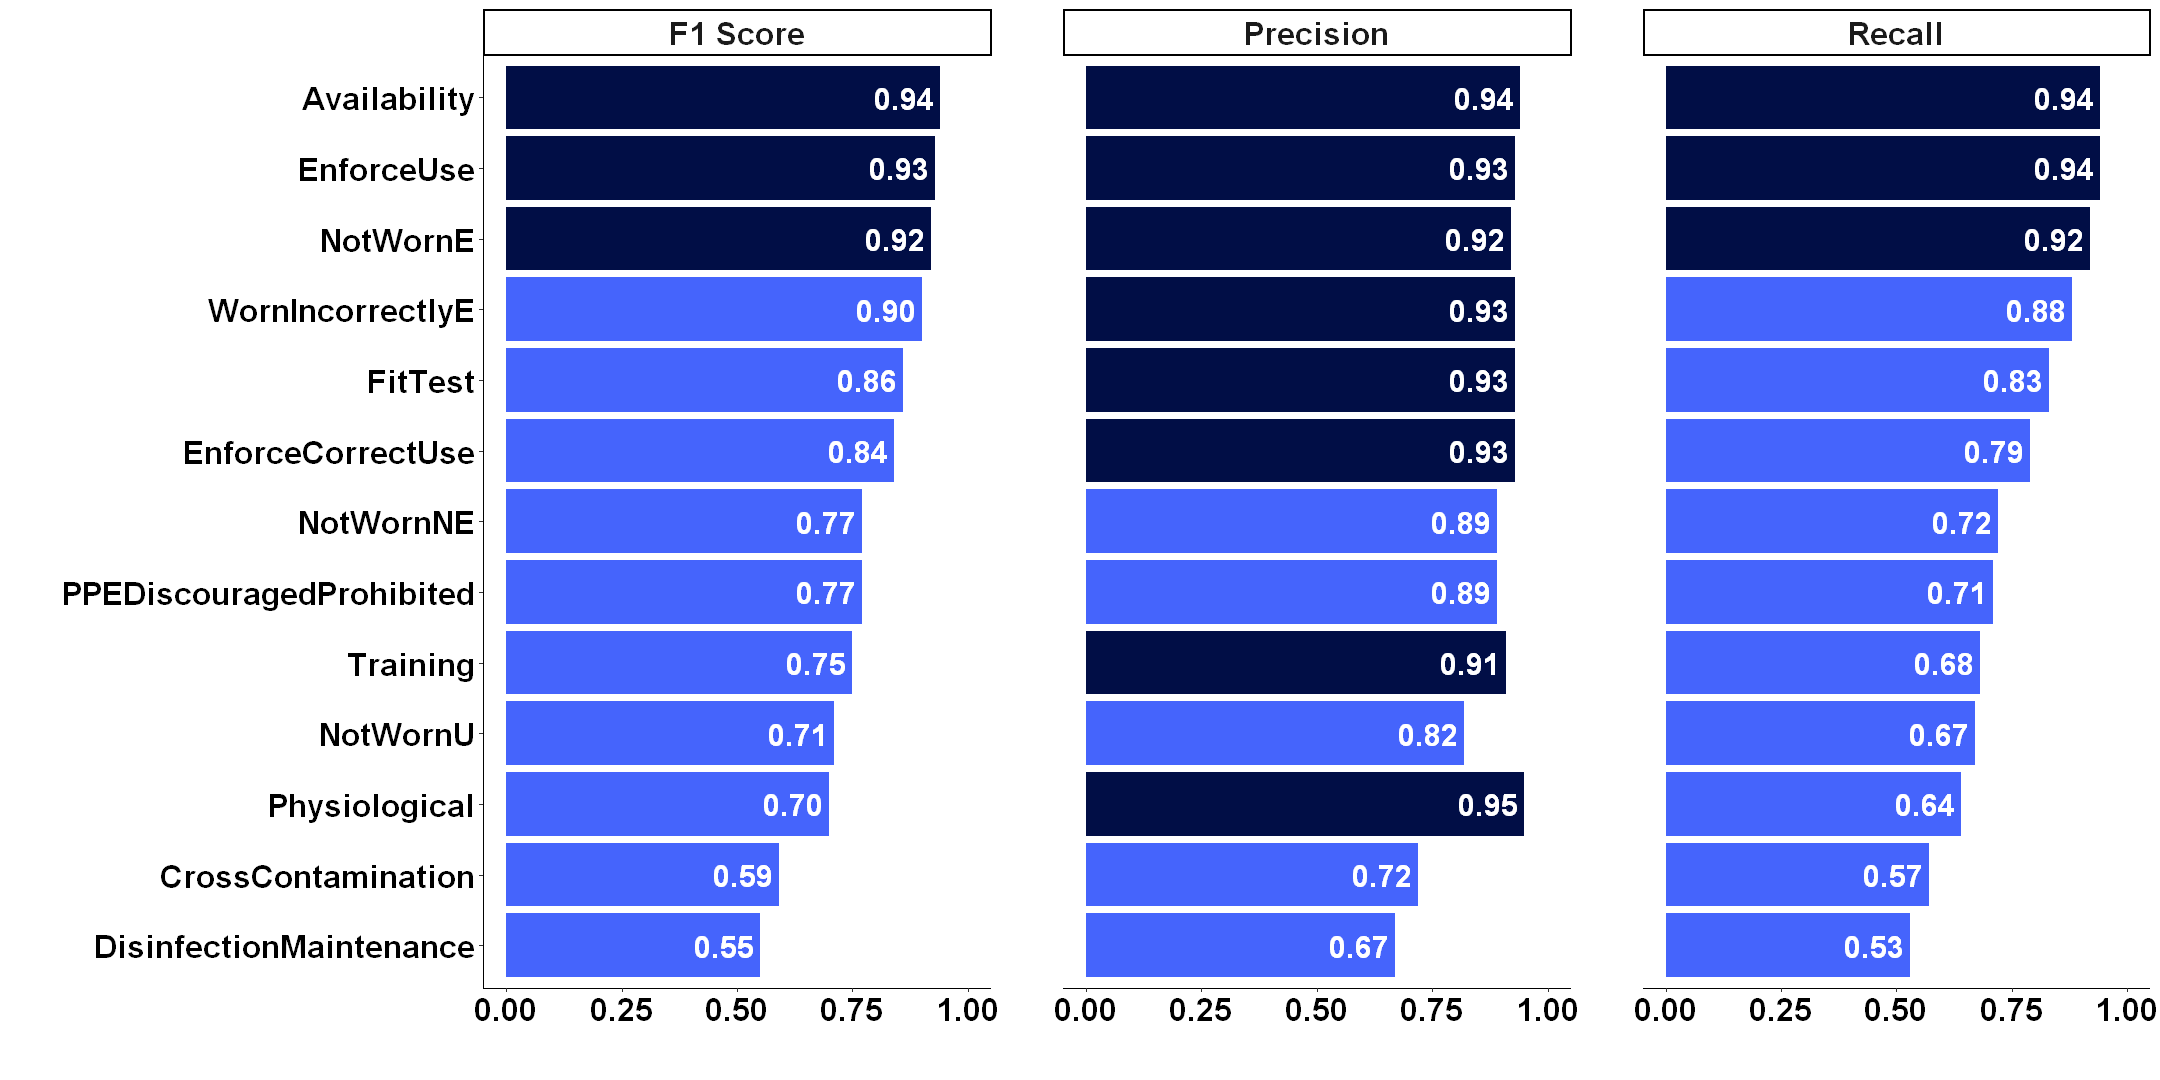

In [7]:
options(repr.plot.width=18, repr.plot.height=9)
plt_ml = df_means %>% mutate(
    Type = recode(Type, mean_f1="F1 Score", mean_precision="Precision", mean_recall = "Recall"),
    Concern = concern,
    concern = NULL
) %>%
mutate(Concern = factor(Concern, levels = rev(label_order))) %>%
ggplot(aes(x = Score, y = Concern)) +
geom_bar(stat="identity", aes(fill = Score > 0.9)) + 
scale_fill_manual(values = c("#4564FC","#010E46")) +
facet_wrap(.~Type) +
xlim(0, 1) +
theme_classic() +
ylab("") +
xlab("") + 
geom_text(aes(label= format(round(Score, digits = 2), nsmall = 2) ), hjust=1.1, color="white", position = position_dodge(0.9), size=6.5, fontface="bold") +
theme(text = element_text(size = 24, face="bold"), 
      panel.spacing = unit(3, "lines"), 
      axis.text.y=element_text(color="black"),
      axis.text.x=element_text(color="black")) +
guides(fill="none")
plt_ml

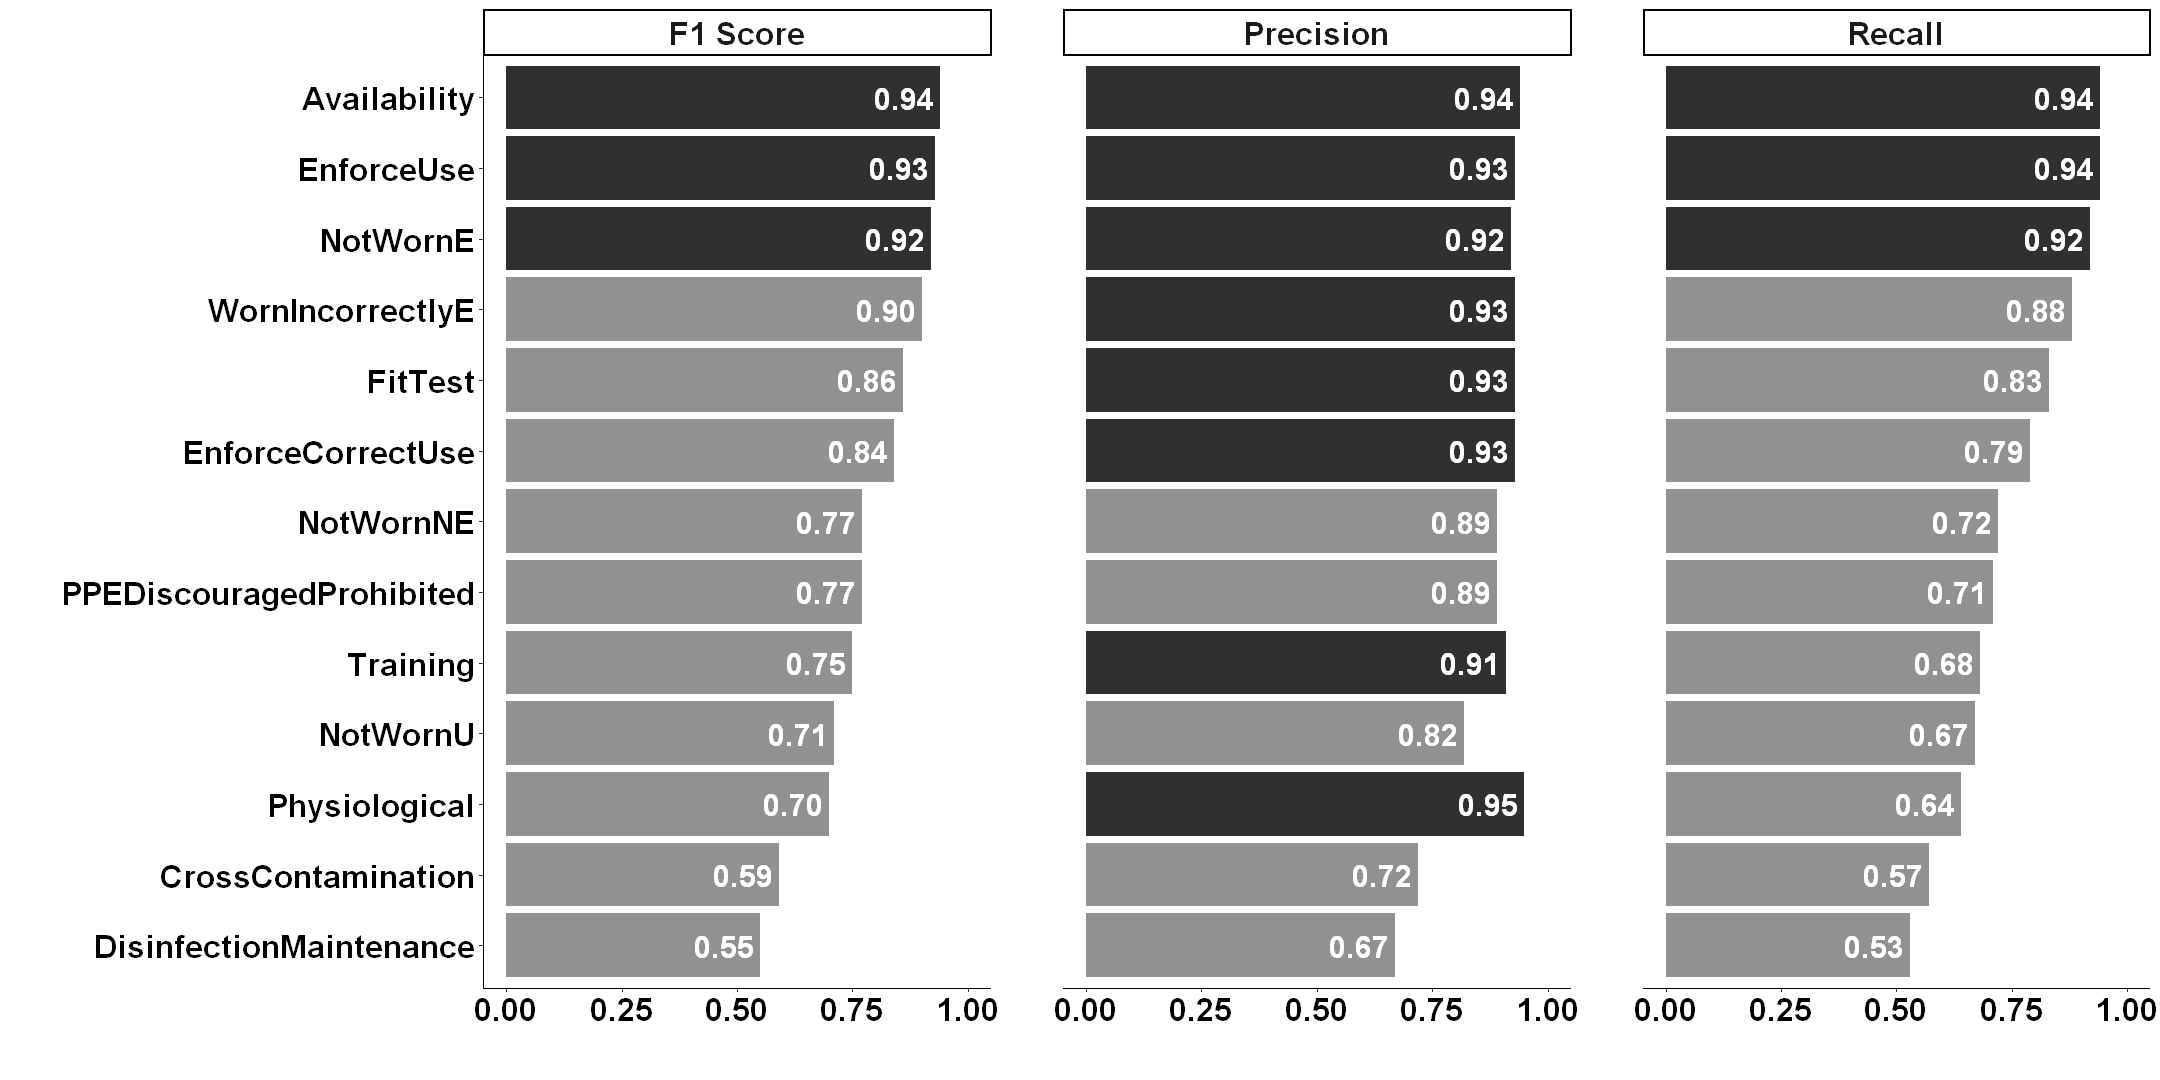

In [8]:
options(repr.plot.width=18, repr.plot.height=9)
plt_ml_grey = df_means %>% mutate(
    Type = recode(Type, mean_f1="F1 Score", mean_precision="Precision", mean_recall = "Recall"),
    Concern = concern,
    concern = NULL
) %>%
mutate(Concern = factor(Concern, levels = rev(label_order))) %>%
ggplot(aes(x = Score, y = Concern)) +
geom_bar(stat="identity", aes(fill = Score > 0.9)) + 
scale_fill_manual(values = c("#919191", "#303030")) +
facet_wrap(.~Type) +
xlim(0, 1) +
theme_classic() +
ylab("") +
xlab("") + 
geom_text(aes(label= format(round(Score, digits = 2), nsmall = 2) ), hjust=1.1, color="white", position = position_dodge(0.9), size=6.5, fontface="bold") +
theme(text = element_text(size = 24, face="bold"), 
      panel.spacing = unit(3, "lines"), 
      axis.text.y=element_text(color="black"),
      axis.text.x=element_text(color="black")) +
guides(fill="none")
plt_ml_grey

In [9]:
# Write to file
ggsave(plt_ml, file="fig_2.eps", device="eps", width=18, height=9, units="in")
ggsave(plt_ml_grey, file="fig_2_grey.eps", device="eps", width=18, height=9, units="in")